In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

pd.set_option('display.max_columns',None)

In [53]:
dataframe = pd.read_csv('2025_Drivers_preprocessed.csv')
dataframe.head(10)

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds,Driver_code,Country_code,Team_code
0,1,44,Lewis Hamilton,Mercedes,58.0,1:31:54.067,25.0,Flag of AustraliaAustralia,2015-03-15,5514.067,26,0,23
1,6,3,Daniel Ricciardo,Red Bull Racing Renault,57.0,+1 lap,8.0,Flag of AustraliaAustralia,2015-03-15,90.000,6,0,31
2,7,27,Nico Hulkenberg,Force India Mercedes,57.0,+1 lap,6.0,Flag of AustraliaAustralia,2015-03-15,90.000,33,0,11
3,9,55,Carlos Sainz,STR Renault,57.0,+1 lap,2.0,Flag of AustraliaAustralia,2015-03-15,90.000,4,0,34
4,10,11,Sergio Perez,Force India Mercedes,57.0,+1 lap,1.0,Flag of AustraliaAustralia,2015-03-15,90.000,49,0,11
5,2,44,Lewis Hamilton,Mercedes,56.0,+8.569s,18.0,Flag of MalaysiaMalaysia,2015-03-29,8.569,26,20,23
6,5,77,Valtteri Bottas,Williams Mercedes,56.0,+70.409s,10.0,Flag of MalaysiaMalaysia,2015-03-29,70.409,51,20,40
7,7,33,Max Verstappen,STR Renault,56.0,+97.762s,6.0,Flag of MalaysiaMalaysia,2015-03-29,97.762,30,20,34
8,8,55,Carlos Sainz,STR Renault,55.0,+1 lap,4.0,Flag of MalaysiaMalaysia,2015-03-29,90.000,4,20,34
9,10,3,Daniel Ricciardo,Red Bull Racing Renault,55.0,+1 lap,1.0,Flag of MalaysiaMalaysia,2015-03-29,90.000,6,20,31


In [54]:
dataframe.shape

(2668, 13)

In [55]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pos.            2668 non-null   int64  
 1   No.             2668 non-null   int64  
 2   Driver          2668 non-null   object 
 3   Team            2668 non-null   object 
 4   Laps            2668 non-null   float64
 5   Time / Retired  2668 non-null   object 
 6   Pts.            2668 non-null   float64
 7   Country         2668 non-null   object 
 8   Race Dates      2668 non-null   object 
 9   Time_seconds    2668 non-null   float64
 10  Driver_code     2668 non-null   int64  
 11  Country_code    2668 non-null   int64  
 12  Team_code       2668 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 271.1+ KB


In [56]:
dataframe.drop(['Driver_code','Country_code','Team_code'],axis=1,inplace=True)
dataframe.head()

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds
0,1,44,Lewis Hamilton,Mercedes,58.0,1:31:54.067,25.0,Flag of AustraliaAustralia,2015-03-15,5514.067
1,6,3,Daniel Ricciardo,Red Bull Racing Renault,57.0,+1 lap,8.0,Flag of AustraliaAustralia,2015-03-15,90.000
2,7,27,Nico Hulkenberg,Force India Mercedes,57.0,+1 lap,6.0,Flag of AustraliaAustralia,2015-03-15,90.000
3,9,55,Carlos Sainz,STR Renault,57.0,+1 lap,2.0,Flag of AustraliaAustralia,2015-03-15,90.000
4,10,11,Sergio Perez,Force India Mercedes,57.0,+1 lap,1.0,Flag of AustraliaAustralia,2015-03-15,90.000


In [57]:
from sklearn.preprocessing import LabelEncoder

driver_encoder = LabelEncoder()
country_encoder = LabelEncoder()
team_encoder = LabelEncoder()

dataframe['Driver_code'] = driver_encoder.fit_transform(dataframe['Driver'])
dataframe['Country_code'] = country_encoder.fit_transform(dataframe['Country'])
dataframe['Team_code'] = team_encoder.fit_transform(dataframe['Team'])


In [58]:
dataframe.columns

Index(['Pos.', 'No.', 'Driver', 'Team', 'Laps', 'Time / Retired', 'Pts.',
       'Country', 'Race Dates', 'Time_seconds', 'Driver_code', 'Country_code',
       'Team_code'],
      dtype='object')

In [59]:
# Suppose your position column is 'Pos.'
dataframe['Pos_class'] = dataframe['Pos.'].apply(lambda x: x if x <= 10 else 11)

In [73]:
df = dataframe[['Pos.', 'No.', 'Laps', 'Pts.','Race Dates', 'Time_seconds', 'Driver_code', 'Country_code','Team_code','Pos_class']]
df.head(10)

,Pos.,No.,Laps,Pts.,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
0,1,44,58.0,25.0,2015-03-15,5514.067,9,0,20,1
1,6,3,57.0,8.0,2015-03-15,90.000,2,0,28,6
2,7,27,57.0,6.0,2015-03-15,90.000,12,0,10,7
3,9,55,57.0,2.0,2015-03-15,90.000,0,0,31,9
4,10,11,57.0,1.0,2015-03-15,90.000,15,0,10,10
5,2,44,56.0,18.0,2015-03-29,8.569,9,20,20,2
6,5,77,56.0,10.0,2015-03-29,70.409,16,20,37,5
7,7,33,56.0,6.0,2015-03-29,97.762,11,20,31,7
8,8,55,55.0,4.0,2015-03-29,90.000,0,20,31,8
9,10,3,55.0,1.0,2015-03-29,90.000,2,20,28,10


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pos.          2668 non-null   int64  
 1   No.           2668 non-null   int64  
 2   Laps          2668 non-null   float64
 3   Pts.          2668 non-null   float64
 4   Time_seconds  2668 non-null   float64
 5   Driver_code   2668 non-null   int32  
 6   Country_code  2668 non-null   int32  
 7   Team_code     2668 non-null   int32  
 8   Pos_class     2668 non-null   int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 156.5 KB


In [62]:
dataframe.describe(include='all')

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
count,2668.000000,2668.000000,2668,2668,2668.000000,2668,2668.000000,2668,2668,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
unique,NaN,NaN,19,38,NaN,1912,NaN,36,233,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Lewis Hamilton,Mercedes,NaN,+1 lap,NaN,Flag of SpainSpain,2024-06-23,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,218,373,NaN,673,NaN,131,19,NaN,NaN,NaN,NaN,NaN
mean,8.102324,29.149550,NaN,NaN,59.634558,NaN,7.183471,NaN,NaN,490.921969,8.454648,17.746627,17.446777,7.135307
std,4.864997,23.050354,NaN,NaN,9.963426,NaN,7.776136,NaN,NaN,1534.255921,5.406655,10.597640,9.953839,3.531430
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,0.179000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,11.000000,NaN,NaN,53.000000,NaN,0.000000,NaN,NaN,28.063500,4.000000,8.000000,9.000000,4.000000
50%,8.000000,22.000000,NaN,NaN,57.000000,NaN,4.000000,NaN,NaN,68.790500,8.000000,17.000000,18.000000,8.000000
75%,12.000000,44.000000,NaN,NaN,69.000000,NaN,12.000000,NaN,NaN,90.000000,14.000000,27.000000,25.000000,11.000000


In [63]:
correlation = df.corr()
correlation

,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
Pos.,1.000000,-0.110208,-0.038725,-0.888361,-0.394103,0.053369,0.019717,-0.126356,0.943495
No.,-0.110208,1.000000,0.017560,0.118641,0.009469,0.087999,0.001666,0.106526,-0.128542
Laps,-0.038725,0.017560,1.000000,0.038549,0.024468,0.000956,-0.034904,0.019140,-0.029242
Pts.,-0.888361,0.118641,0.038549,1.000000,0.637124,0.003375,-0.005276,0.158719,-0.970774
Time_seconds,-0.394103,0.009469,0.024468,0.637124,1.000000,0.057003,0.003731,0.108197,-0.473024
Driver_code,0.053369,0.087999,0.000956,0.003375,0.057003,1.000000,-0.012844,-0.036640,0.026175
Country_code,0.019717,0.001666,-0.034904,-0.005276,0.003731,-0.012844,1.000000,-0.016155,0.009152
Team_code,-0.126356,0.106526,0.019140,0.158719,0.108197,-0.036640,-0.016155,1.000000,-0.151238
Pos_class,0.943495,-0.128542,-0.029242,-0.970774,-0.473024,0.026175,0.009152,-0.151238,1.000000


<Axes: >

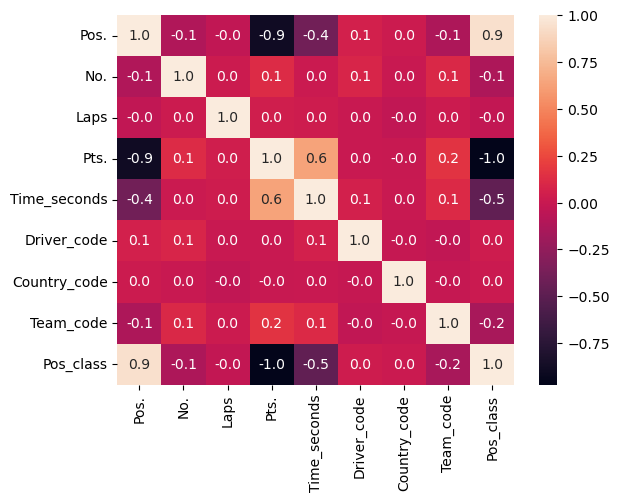

In [64]:
plt.figure()
sns.heatmap(correlation,fmt='.1f',annot=True)

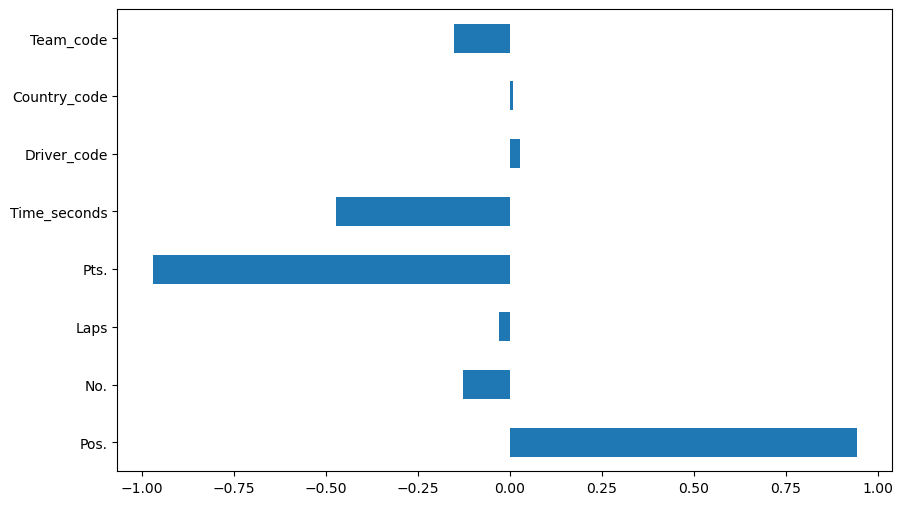

In [65]:
correlation_values = df.corr()['Pos_class'].drop('Pos_class')
correlation_values.plot(kind='barh', figsize=(10, 6))
plt.show()

In [66]:
df.shape

(2668, 9)

In [67]:
j = 0
for i in df.columns: 
    if ((correlation[i] <= 0).sum()) >= 4:
        j = j+1
        print(j,'.',i,(correlation[i] <= 0).sum())

1 . Pos. 5
2 . Country_code 4
3 . Team_code 4
4 . Pos_class 5


In [49]:
df.columns

Index(['Pos.', 'No.', 'Laps', 'Pts.', 'Time_seconds', 'Driver_code',
       'Country_code', 'Team_code'],
      dtype='object')

# Application 

In [74]:
df.head()

,Pos.,No.,Laps,Pts.,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
0,1,44,58.0,25.0,2015-03-15,5514.067,9,0,20,1
1,6,3,57.0,8.0,2015-03-15,90.000,2,0,28,6
2,7,27,57.0,6.0,2015-03-15,90.000,12,0,10,7
3,9,55,57.0,2.0,2015-03-15,90.000,0,0,31,9
4,10,11,57.0,1.0,2015-03-15,90.000,15,0,10,10


In [75]:
df['Race Dates'] = pd.to_datetime(df['Race Dates'])

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_12744\1034952387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race Dates'] = pd.to_datetime(df['Race Dates'])


In [76]:
df['Race Dates'].dtype

dtype('<M8[ns]')

# Results dataframe

In [77]:
dataframe['Race Dates'] = pd.to_datetime(dataframe['Race Dates'])
result = dataframe[dataframe['Race Dates'] > pd.to_datetime('2024-12-31')]

In [78]:
result['Country'].unique()

array(['Flag of AustraliaAustralia',
       'Flag of People’s Republic of ChinaChina', 'Flag of JapanJapan',
       'Flag of BahrainBahrain', 'Flag of Saudi ArabiaSaudi Arabia',
       'Flag of United States of AmericaMiami',
       'Flag of ItalyEmilia-Romagna', 'Flag of MonacoMonaco',
       'Flag of SpainSpain', 'Flag of CanadaCanada',
       'Flag of AustriaAustria', 'Flag of Great BritainGreat Britain',
       'Flag of BelgiumBelgium', 'Flag of HungaryHungary',
       'Flag of NetherlandsNetherlands', 'Flag of ItalyItaly',
       'Flag of AzerbaijanAzerbaijan', 'Flag of SingaporeSingapore',
       'Flag of United States of AmericaUnited States',
       'Flag of MexicoMexico', 'Flag of BrazilBrazil',
       'Flag of United States of AmericaLas Vegas', 'Flag of QatarQatar',
       'Flag of United Arab EmiratesAbu Dhabi'], dtype=object)

In [93]:
c = result[['Country','Country_code']]
c[c['Country'] == 'Flag of United States of AmericaLas Vegas'].head(1)

,Country,Country_code
2634,Flag of United States of AmericaLas Vegas,33


In [94]:
r = result[result['Country_code'] == 33]
r.head()

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
2634,1,1,Max Verstappen,Red Bull Racing,50.0,1:21:08.429,25.0,Flag of United States of AmericaLas Vegas,2025-11-22,4868.429,11,33,24,1
2635,2,63,George Russell,Mercedes,50.0,+23.546s,18.0,Flag of United States of AmericaLas Vegas,2025-11-22,23.546,5,33,20,2
2636,4,16,Charles Leclerc,Ferrari,50.0,+30.678s,12.0,Flag of United States of AmericaLas Vegas,2025-11-22,30.678,1,33,9,4
2637,5,55,Carlos Sainz,Williams,50.0,+34.924s,10.0,Flag of United States of AmericaLas Vegas,2025-11-22,34.924,0,33,36,5
2638,7,27,Nico Hulkenberg,Kick Sauber,50.0,+51.134s,6.0,Flag of United States of AmericaLas Vegas,2025-11-22,51.134,12,33,13,7


In [95]:
r.drop(['Time_seconds', 'Driver_code', 'Country_code','Team_code','Pos_class'],axis=1,inplace=True)
r.head()

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_12744\2083436844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r.drop(['Time_seconds', 'Driver_code', 'Country_code','Team_code','Pos_class'],axis=1,inplace=True)


,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates
2634,1,1,Max Verstappen,Red Bull Racing,50.0,1:21:08.429,25.0,Flag of United States of AmericaLas Vegas,2025-11-22
2635,2,63,George Russell,Mercedes,50.0,+23.546s,18.0,Flag of United States of AmericaLas Vegas,2025-11-22
2636,4,16,Charles Leclerc,Ferrari,50.0,+30.678s,12.0,Flag of United States of AmericaLas Vegas,2025-11-22
2637,5,55,Carlos Sainz,Williams,50.0,+34.924s,10.0,Flag of United States of AmericaLas Vegas,2025-11-22
2638,7,27,Nico Hulkenberg,Kick Sauber,50.0,+51.134s,6.0,Flag of United States of AmericaLas Vegas,2025-11-22


# Train dataframe

In [96]:
train = df[df['Race Dates'] <= pd.to_datetime('2024-12-31')]
train.drop('Race Dates',axis=1,inplace=True)
print(train.shape)
train.head()

(2390, 9)


C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_12744\3000673310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Race Dates',axis=1,inplace=True)


,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
0,1,44,58.0,25.0,5514.067,9,0,20,1
1,6,3,57.0,8.0,90.000,2,0,28,6
2,7,27,57.0,6.0,90.000,12,0,10,7
3,9,55,57.0,2.0,90.000,0,0,31,9
4,10,11,57.0,1.0,90.000,15,0,10,10


# Test dataframe

In [97]:
test = df[df['Race Dates'] > pd.to_datetime('2024-12-31')]
print(test.shape)
test.head()

(278, 10)


,Pos.,No.,Laps,Pts.,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
2390,1,4,57.0,25.0,2025-03-16,6126.304,8,0,16,1
2391,2,1,57.0,18.0,2025-03-16,0.895,11,0,24,2
2392,3,63,57.0,15.0,2025-03-16,8.481,5,0,20,3
2393,6,18,57.0,8.0,2025-03-16,17.413,7,0,6,6
2394,7,27,57.0,6.0,2025-03-16,18.423,12,0,13,7


In [98]:
race = test[test['Country_code'] == 33]
race.drop('Race Dates',axis=1,inplace=True)
race

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_12744\558840671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race.drop('Race Dates',axis=1,inplace=True)


,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
2634,1,1,50.0,25.0,4868.429,11,33,24,1
2635,2,63,50.0,18.0,23.546,5,33,20,2
2636,4,16,50.0,12.0,30.678,1,33,9,4
2637,5,55,50.0,10.0,34.924,0,33,36,5
2638,7,27,50.0,6.0,51.134,12,33,13,7
2639,8,44,50.0,4.0,59.369,9,33,9,8
2640,9,31,50.0,2.0,60.635,3,33,11,9
2641,11,14,50.0,0.0,85.308,4,33,6,11
2642,12,22,50.0,0.0,86.974,17,33,24,11
2643,13,10,50.0,0.0,91.702,14,33,4,11


# Data spliting

In [99]:
X_test = race.drop('Pos_class',axis=1)    # create the test data set by yourself see above test data frame
y_test = race['Pos_class']
X_train = train.drop('Pos_class',axis=1)
y_train = train['Pos_class']

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of y_test : ', y_test.shape)

Size of X_train :  (2390, 8)
Size of y_train :  (2390,)
Size of X_test :  (10, 8)
Size of y_test :  (10,)


In [100]:
rfc = RandomForestClassifier(n_estimators=100,random_state=25)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=25)

# Making Predicition

In [106]:
y_pred = rfc.predict(X_test)

In [107]:
y_proba = rfc.predict_proba(X_test)

In [108]:
probablities = pd.DataFrame(y_proba,columns=range(1,12))

In [109]:
r['Predicted Position'] = y_pred

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_12744\1008806100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Predicted Position'] = y_pred


In [110]:
# Suppose your original result DataFrame is called df_result
# And your probabilities DataFrame is called probabilities

df_merged = pd.concat([r.reset_index(drop=True),
                       probablities.reset_index(drop=True)],
                      axis=1)

In [111]:
df_merged

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Predicted Position,1,2,3,4,5,6,7,8,9,10,11
0,1,1,Max Verstappen,Red Bull Racing,50.0,1:21:08.429,25.0,Flag of United States of AmericaLas Vegas,2025-11-22,1,0.99,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
1,2,63,George Russell,Mercedes,50.0,+23.546s,18.0,Flag of United States of AmericaLas Vegas,2025-11-22,2,0.03,0.79,0.15,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2,4,16,Charles Leclerc,Ferrari,50.0,+30.678s,12.0,Flag of United States of AmericaLas Vegas,2025-11-22,4,0.00,0.00,0.06,0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,5,55,Carlos Sainz,Williams,50.0,+34.924s,10.0,Flag of United States of AmericaLas Vegas,2025-11-22,5,0.00,0.01,0.02,0.10,0.58,0.25,0.02,0.01,0.00,0.01,0.00
4,7,27,Nico Hulkenberg,Kick Sauber,50.0,+51.134s,6.0,Flag of United States of AmericaLas Vegas,2025-11-22,7,0.00,0.00,0.00,0.00,0.01,0.03,0.89,0.06,0.01,0.00,0.00
5,8,44,Lewis Hamilton,Ferrari,50.0,+59.369s,4.0,Flag of United States of AmericaLas Vegas,2025-11-22,8,0.00,0.00,0.00,0.01,0.01,0.06,0.04,0.71,0.10,0.07,0.00
6,9,31,Esteban Ocon,Haas F1 Team,50.0,+60.635s,2.0,Flag of United States of AmericaLas Vegas,2025-11-22,9,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.94,0.02,0.00
7,11,14,Fernando Alonso,Aston Martin,50.0,+85.308s,0.0,Flag of United States of AmericaLas Vegas,2025-11-22,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
8,12,22,Yuki Tsunoda,Red Bull Racing,50.0,+86.974s,0.0,Flag of United States of AmericaLas Vegas,2025-11-22,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.97
9,13,10,Pierre Gasly,Alpine,50.0,+91.702s,0.0,Flag of United States of AmericaLas Vegas,2025-11-22,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
